In [3]:
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.io import loadmat
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# from tsne import bh_sne
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split


# Load data

In [10]:
data = pd.read_csv("./data/data.csv")

data['binary_order'] = (data['track_number']-1)%10 # average number of tracks / album
# order = data['track_number']/data['total_tracks']


labels = data['binary_order']

columns_to_remove = ['Unnamed: 0',
                    'id',
                    'track_title',
                    'album_title',
                    'album_artist',
                    'track_number',
                    'total_tracks',
                    'order',
                    'binary_order',
                    'key',
                    'mode',
                    'duration_ms',
                    'time_signature',
                    'loudness',
                    'tempo']

# segmentColumnsToNormalise = ['loudness_start', 'loudness_max']
# data[segmentColumnsToNormalise] = MinMaxScaler().fit_transform(segmentData[segmentColumnsToNormalise])

# data


data.drop(columns = columns_to_remove, axis = 1, inplace = True)

        # Danceability, Energy, Loudness, Speechiness, Acousticness, 
        # Instrumentalness, Liveness, Valence, Tempo, Track Number/Total Albums

data['label']=labels
print(data['label'].unique())
data

[0 1 2 3 4 5 6 7 8 9]


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,label
0,0.788,0.616,0.0337,0.00286,0.549000,0.0952,0.6960,0
1,0.712,0.500,0.0338,0.82500,0.314000,0.1060,0.6820,1
2,0.740,0.682,0.0504,0.06920,0.530000,0.3810,0.4100,2
3,0.702,0.297,0.0317,0.89400,0.485000,0.1030,0.0676,3
4,0.775,0.585,0.0271,0.04220,0.619000,0.0770,0.5180,4
...,...,...,...,...,...,...,...,...
4955,0.530,0.275,0.0349,0.46000,0.000011,0.0729,0.0698,9
4956,0.490,0.495,0.0338,0.17300,0.000000,0.0794,0.2300,0
4957,0.767,0.355,0.0445,0.14600,0.000000,0.2980,0.2880,1
4958,0.743,0.379,0.0784,0.20700,0.196000,0.1110,0.1830,2


In [11]:
data.head(n=5) # List first five rows

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,label
0,0.788,0.616,0.0337,0.00286,0.549,0.0952,0.6960,0
1,0.712,0.500,0.0338,0.82500,0.314,0.1060,0.6820,1
2,0.740,0.682,0.0504,0.06920,0.530,0.3810,0.4100,2
3,0.702,0.297,0.0317,0.89400,0.485,0.1030,0.0676,3
4,0.775,0.585,0.0271,0.04220,0.619,0.0770,0.5180,4


### Uncomment the relevant code lines below and execute to print more description about the data

In [12]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4960 non-null   float64
 1   energy            4960 non-null   float64
 2   speechiness       4960 non-null   float64
 3   acousticness      4960 non-null   float64
 4   instrumentalness  4960 non-null   float64
 5   liveness          4960 non-null   float64
 6   valence           4960 non-null   float64
 7   label             4960 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 310.1 KB


In [13]:
# Get the data shape

data.shape

(4960, 8)

In [14]:
# List columns

data

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,label
0,0.788,0.616,0.0337,0.00286,0.549000,0.0952,0.6960,0
1,0.712,0.500,0.0338,0.82500,0.314000,0.1060,0.6820,1
2,0.740,0.682,0.0504,0.06920,0.530000,0.3810,0.4100,2
3,0.702,0.297,0.0317,0.89400,0.485000,0.1030,0.0676,3
4,0.775,0.585,0.0271,0.04220,0.619000,0.0770,0.5180,4
...,...,...,...,...,...,...,...,...
4955,0.530,0.275,0.0349,0.46000,0.000011,0.0729,0.0698,9
4956,0.490,0.495,0.0338,0.17300,0.000000,0.0794,0.2300,0
4957,0.767,0.355,0.0445,0.14600,0.000000,0.2980,0.2880,1
4958,0.743,0.379,0.0784,0.20700,0.196000,0.1110,0.1830,2


In [15]:
# List counts

# data.count()

In [16]:
# Print basic statistics of the data
data.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,label
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,0.570938,0.594166,0.104256,0.260391,0.205631,0.214554,0.373176,3.939718
std,0.169461,0.213911,0.163507,0.317689,0.330836,0.192179,0.233247,2.838568
min,0.000000,0.006340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.472000,0.450000,0.034400,0.009500,0.000002,0.100000,0.186000,1.000000
50%,0.588000,0.617000,0.046500,0.089500,0.000939,0.132000,0.345000,4.000000
75%,0.690250,0.758000,0.087250,0.476000,0.321000,0.262000,0.537250,6.000000
max,0.989000,0.996000,0.959000,0.994000,0.994000,0.994000,0.977000,9.000000


In [17]:
# MNIST dataset has ten digits. 

print(data['label'].unique())

[0 1 2 3 4 5 6 7 8 9]


# Plotting Functions

In [18]:
def scatter2d(X, y):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(X[:,0], X[:,1], c=y)
    palette = sns.color_palette("husl", len(np.unique(y)))

    # for i in range(len(y)):
    #     ax.text(X[i,0], X[i,1], y[i], color=palette[y[i]-1], fontsize='small')
        
def scatter3d(X, y):
    fig = plt.figure(figsize=(15,10))
    fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)
    palette = sns.color_palette("husl", len(np.unique(y)))

    ax.mouse_init()
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
    # for i in range(len(y)):
    #     ax.text(X[i,0], X[i,1], X[i,2], y[i], color=palette[y[i]-1], fontsize='small')

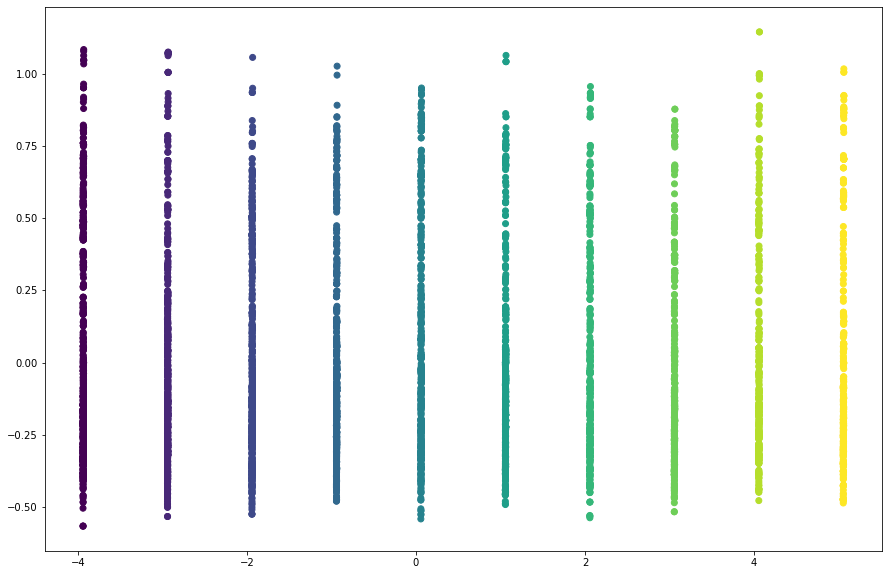

In [19]:
y = labels
# y = y.map({'Iris-setosa' : 0, 'Iris-virginica' : 1, 'Iris-versicolor':2})

pca = PCA(n_components=2, svd_solver='full')
X_r = pca.fit_transform(data)

scatter2d(X_r, y)

### To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions

C:\Users\crisp\AppData\Local\Temp/ipykernel_17748/1756773560.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


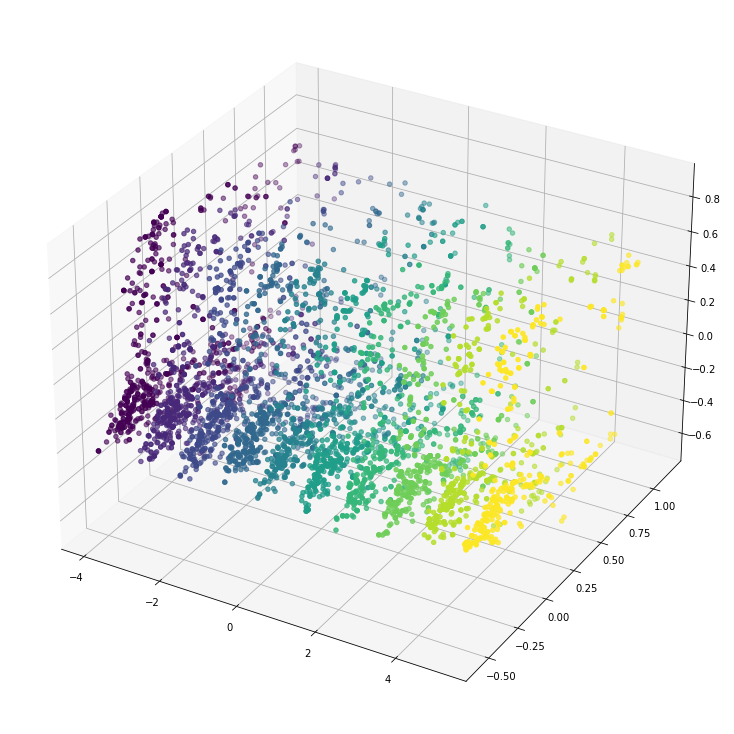

In [20]:
###
#Your code here. Try PCA with three components
###


y = labels
# y = y.map({'Iris-setosa' : 0, 'Iris-virginica' : 1, 'Iris-versicolor':2})

pca = PCA(n_components=3, svd_solver='full')
X_r = pca.fit_transform(data)

scatter3d(X_r, y)


# t-SNE on the MNIST dataset

C:\Users\crisp\anaconda3\envs\AI\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\crisp\anaconda3\envs\AI\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


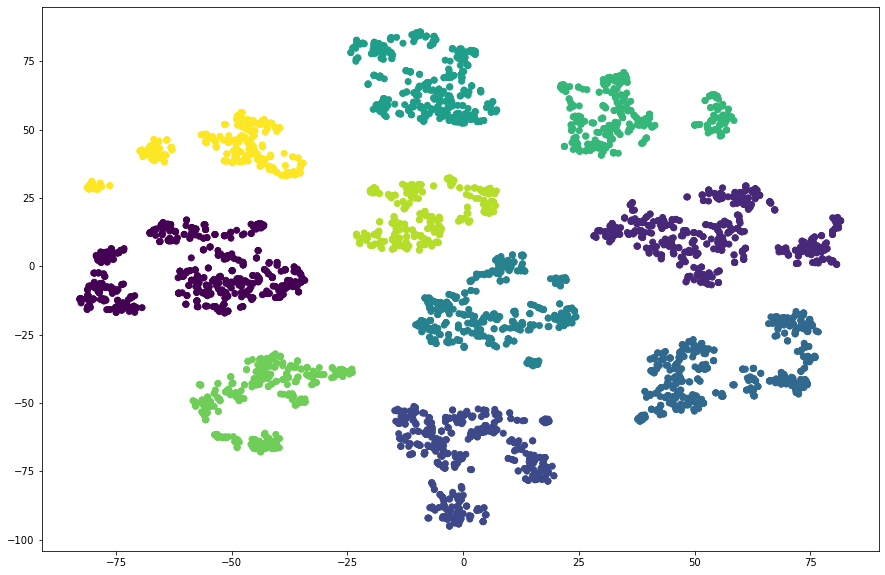

In [21]:
tsne = TSNE(n_components=2)
X_r = tsne.fit_transform(data)

scatter2d(X_r, labels)

C:\Users\crisp\anaconda3\envs\AI\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\crisp\anaconda3\envs\AI\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\crisp\AppData\Local\Temp/ipykernel_18620/1966870443.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


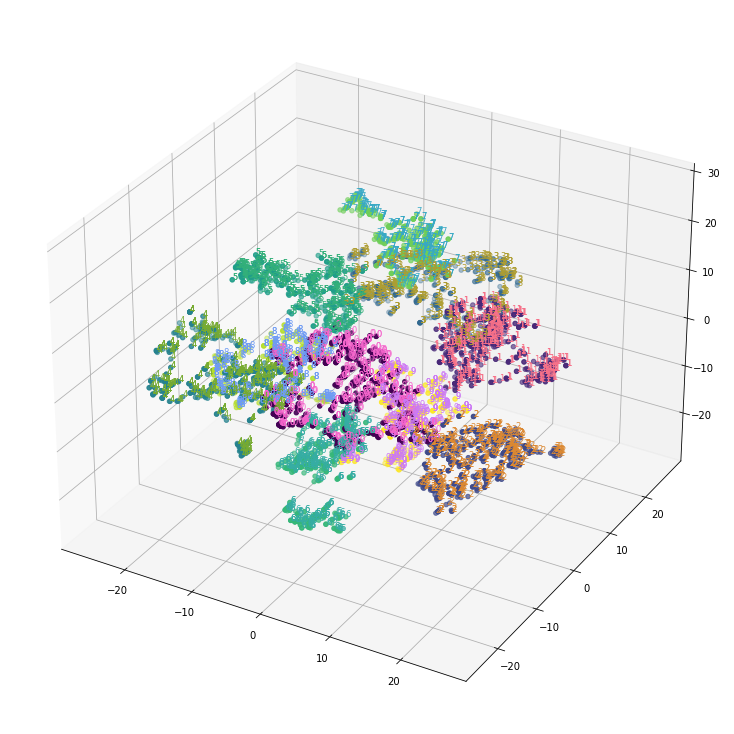

In [86]:
###
#Your code here. Try t-SNE with three components
###

tsne = TSNE(n_components=3)
X_r = tsne.fit_transform(data)

scatter3d(X_r, labels)

## Exploration Tasks

t-SNE offers others parameters including perplexity. The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Try varying perplexity and observe the changes in the output

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#
    

In [65]:
###
#Your code here
###



### Run Barnes-Hut t-SNE (see https://github.com/danielfrg/tsne)

In [66]:
###
#Your code here
###

# %time B = bh_sne(Xs, verbose=True)

In [20]:
###
#Your code here to plot 2d
###

# plt.rcParams["figure.figsize"] = 20, 20
# scatter2d(B, ys)

# UMAP

In [21]:
###
#Your code here
###

# Random Projections

In [22]:
###
#Your code here
###